<a href="https://colab.research.google.com/github/Zandersoph/Rutgers_Intro_AI_Algo/blob/master/HW1_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd
%matplotlib inline
import torch
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import time

<ipython-input-1-88716e25256b>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
<ipython-input-1-88716e25256b>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [2]:
rng = np.random.default_rng(seed=42)
raw_data = rng.random(20000)
raw_data[0:10000]
X_data = raw_data[0:10000] * 3 - 1.5
print(X_data)
Y_data = raw_data[10000:20000] * 2 - 1
print(Y_data)
Label = (X_data**2 * (np.sin(3*X_data))**10 + Y_data**2 < 0.4).astype(int)
print(Label)

[ 0.82186815 -0.18336468  1.07579376 ... -1.0039591  -0.37976881
 -0.05727668]
[ 0.44145677  0.42247552 -0.59460994 ...  0.69426214  0.34160649
 -0.71747991]
[1 1 1 ... 0 1 0]


In [3]:
# Meshgrid creation
grid_size = 200
x_min, x_max = X_data.min(), X_data.max()
y_min, y_max = Y_data.min(), Y_data.max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size), np.linspace(y_min, y_max, grid_size))

In [4]:
# Classifier values
classifier_value = xx**2 * (np.sin(3*xx))**10 + yy**2
mesh_labels = (classifier_value < 0.4).astype(int)

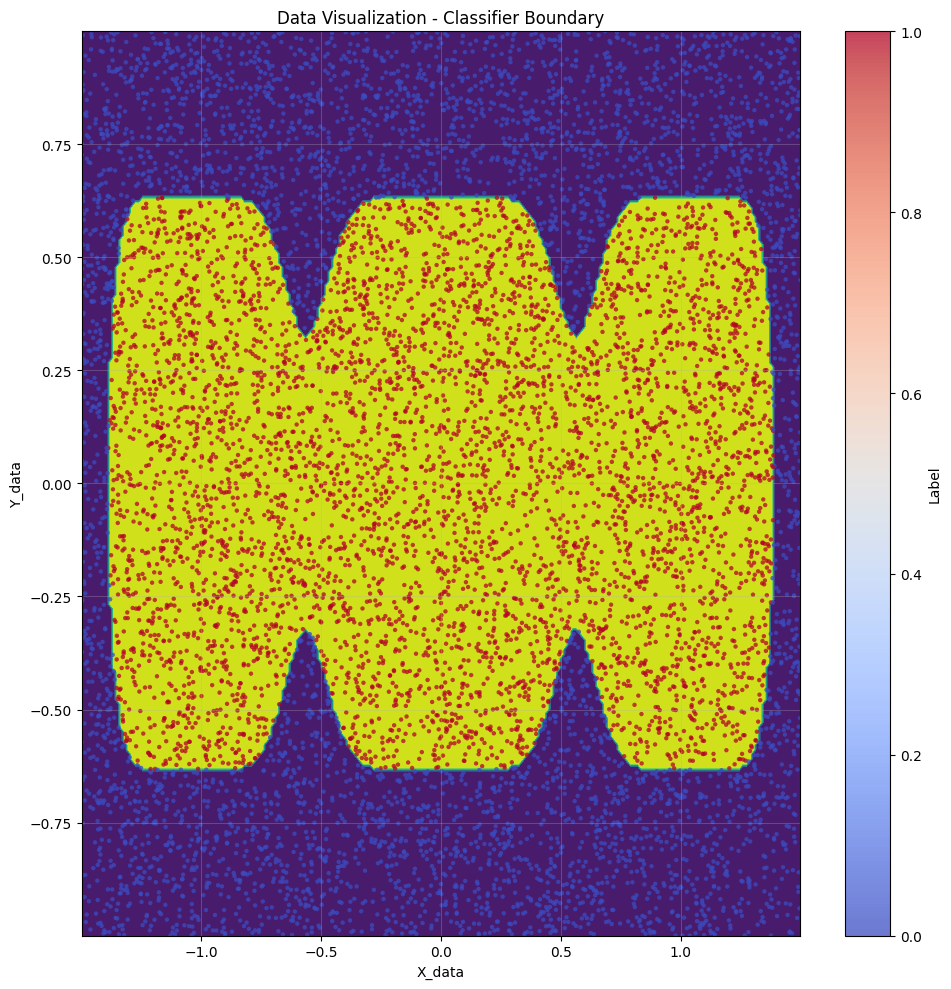

In [7]:
# Decision boundary
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, mesh_labels, cmap='viridis')

# Data points
scatter = plt.scatter(X_data, Y_data, c=Label, cmap='coolwarm', alpha=0.75, edgecolors='none', s=10)

# Plot housekeeping
plt.title('Data Visualization - Classifier Boundary')
plt.xlabel('X_data')
plt.ylabel('Y_data')
plt.colorbar(scatter, label='Label')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()